# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
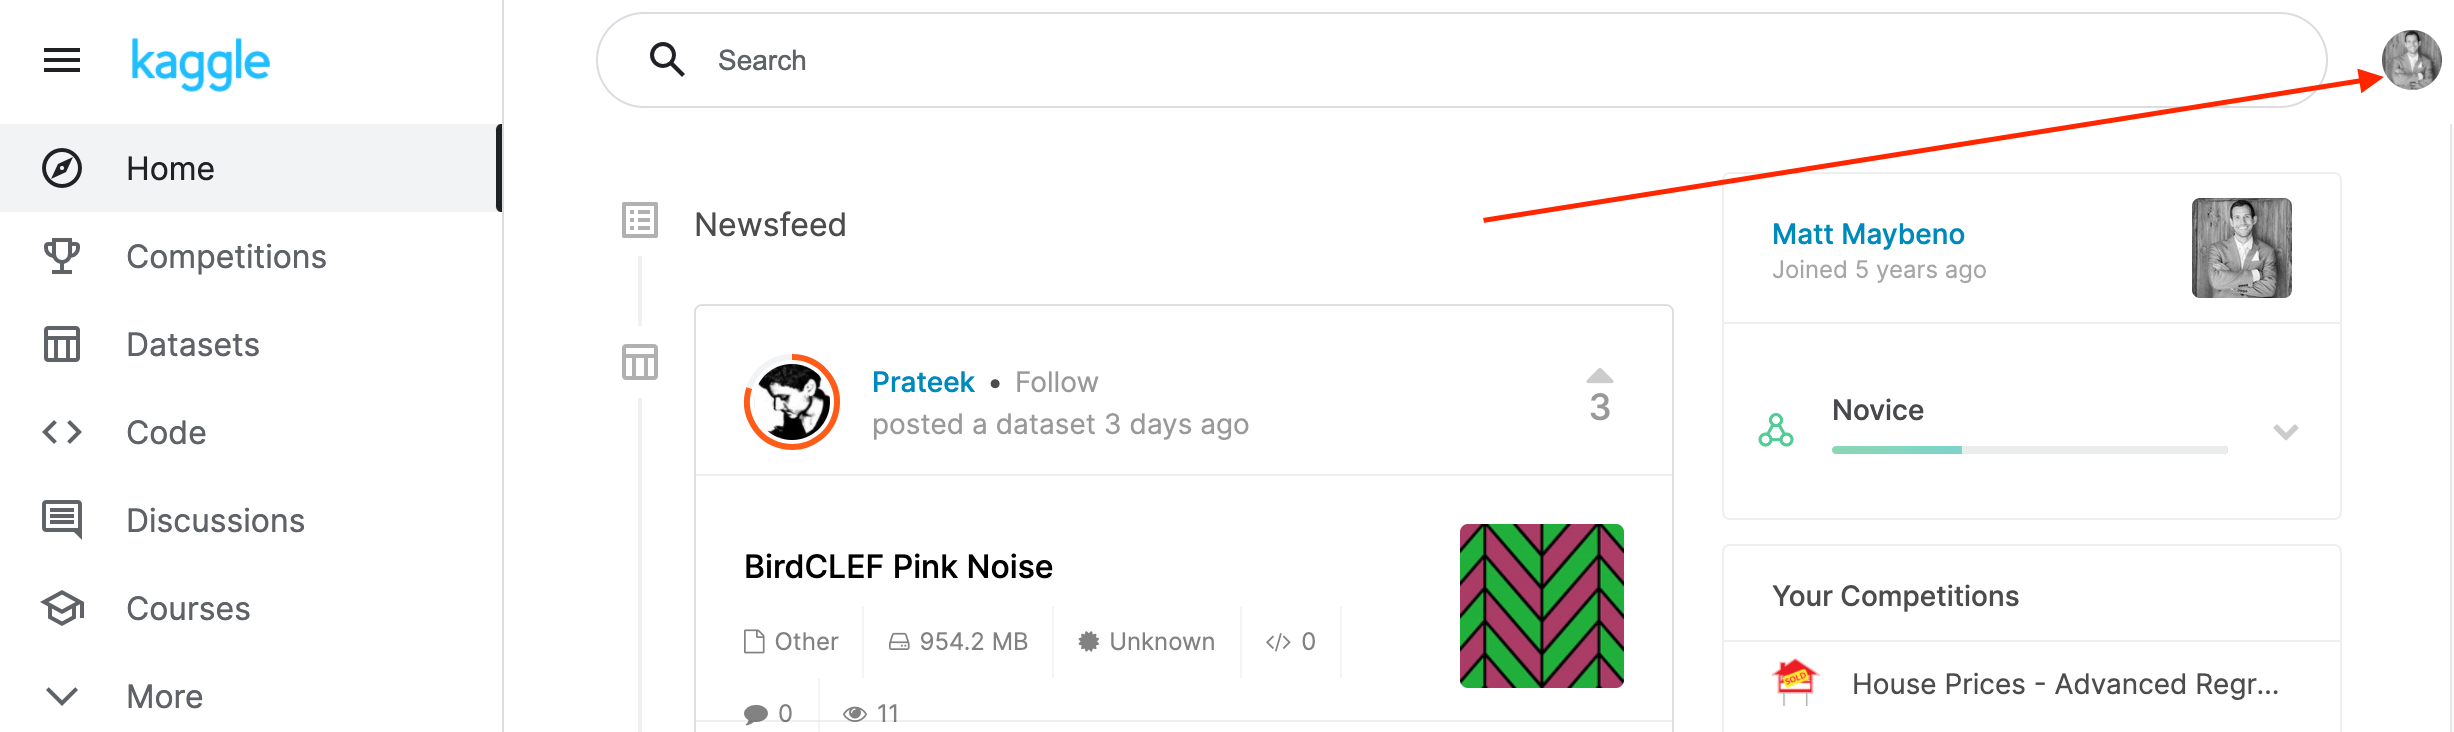
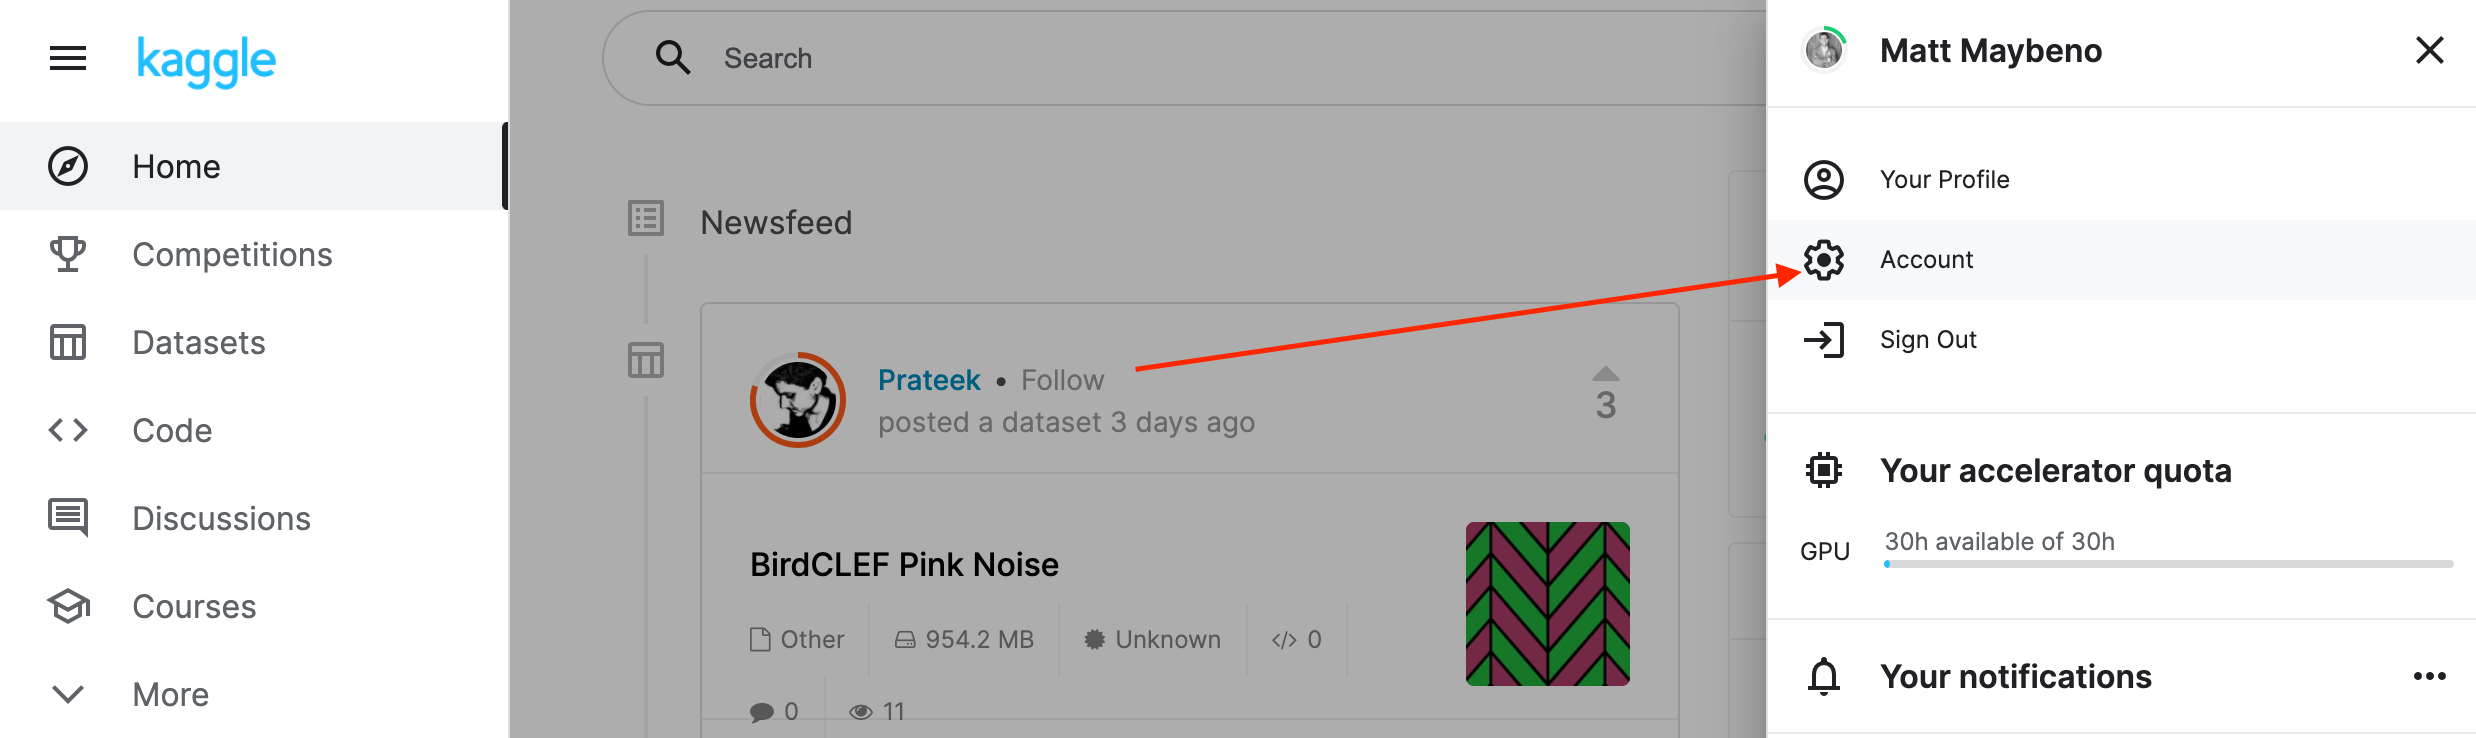
2. Scroll down to API and click Create New API Token.
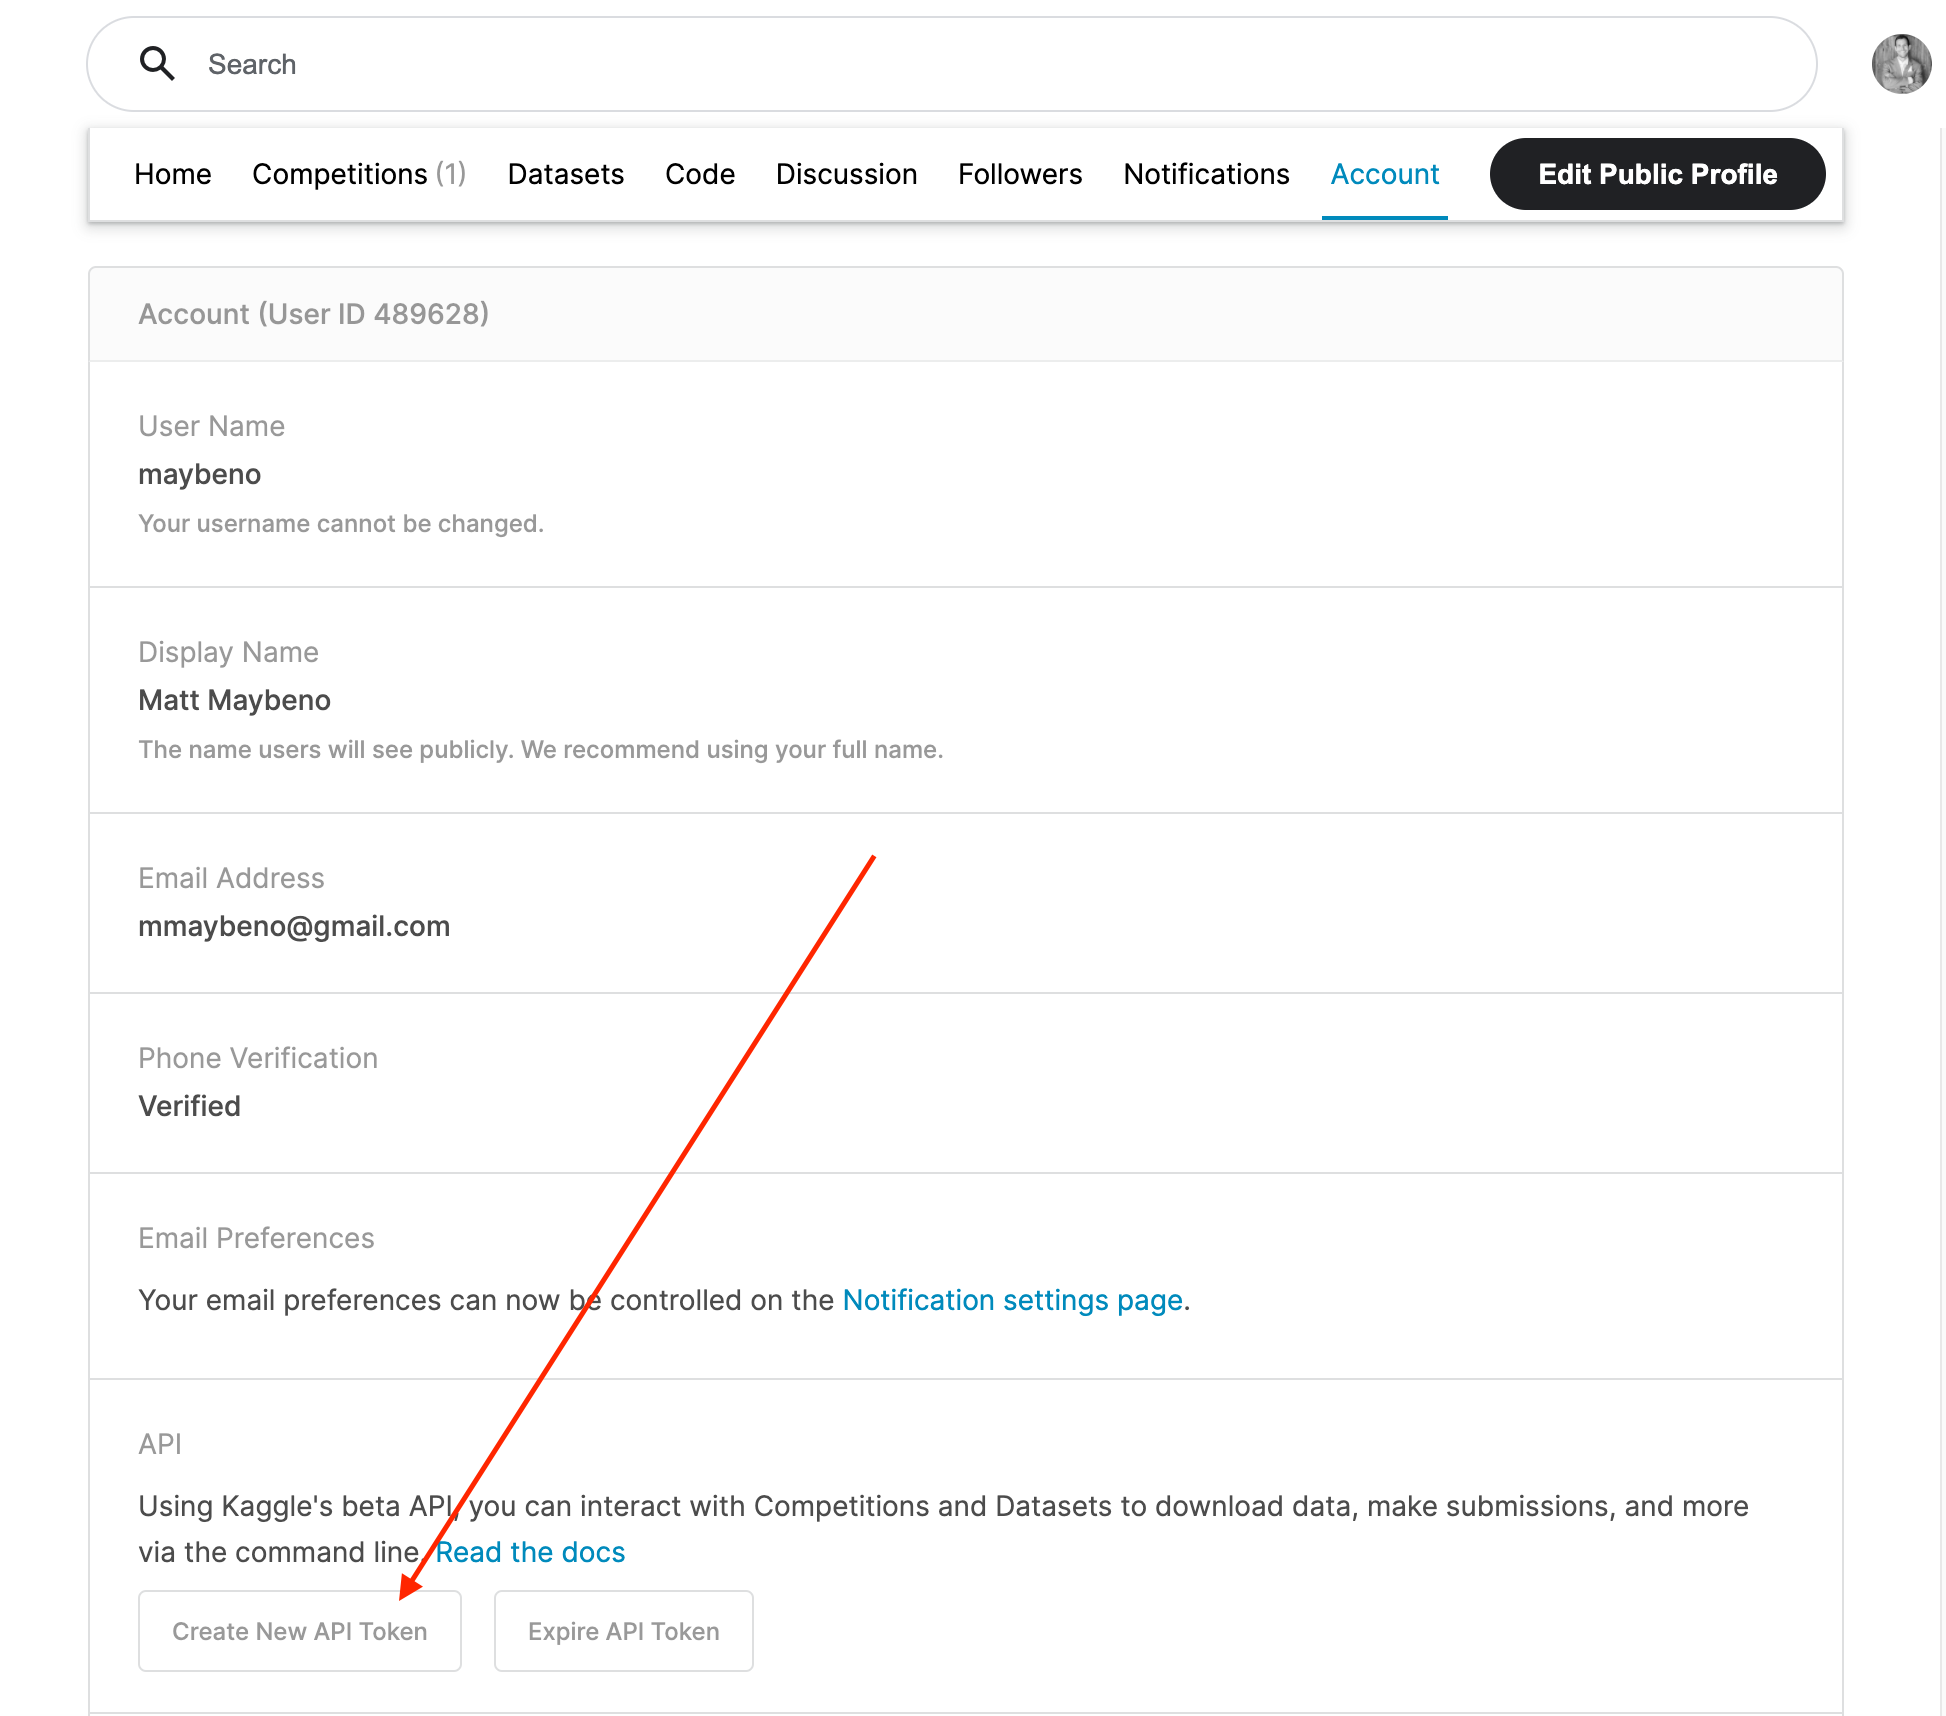
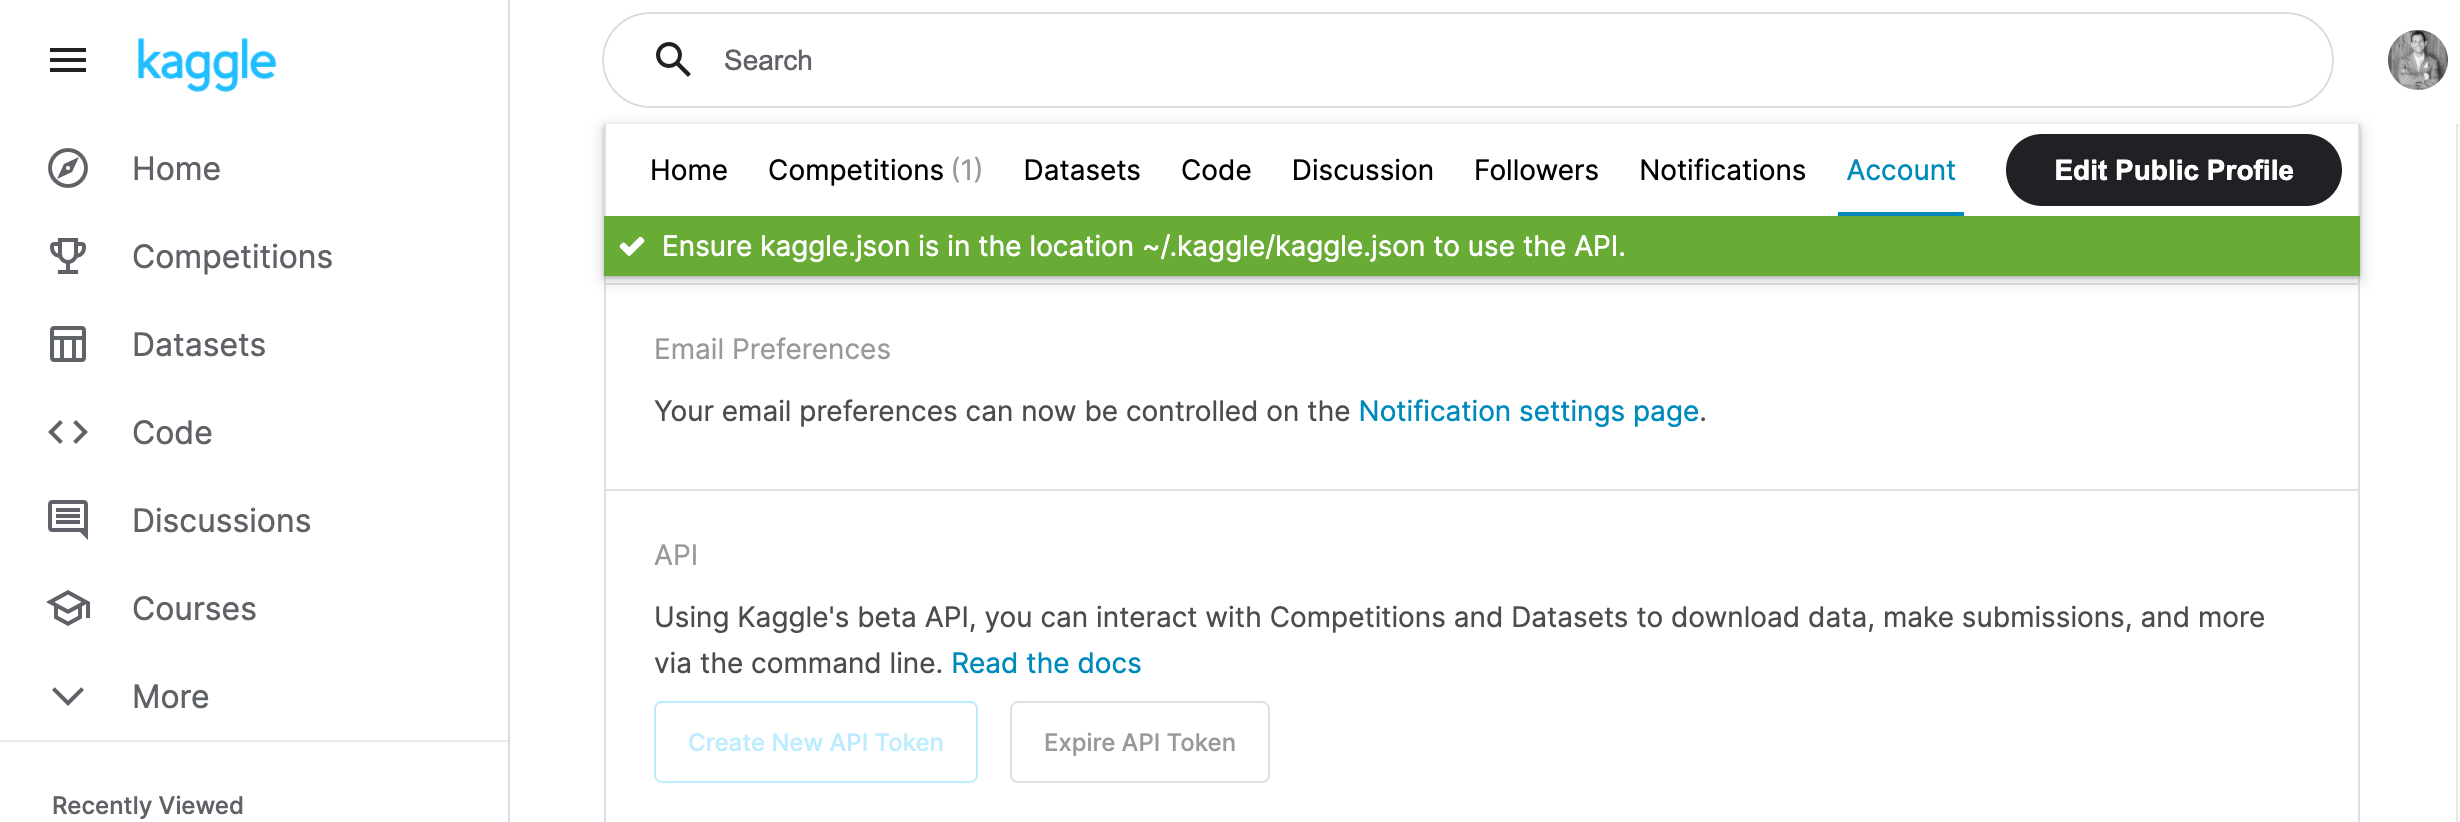
3. Open up `kaggle.json` and use the username and key.
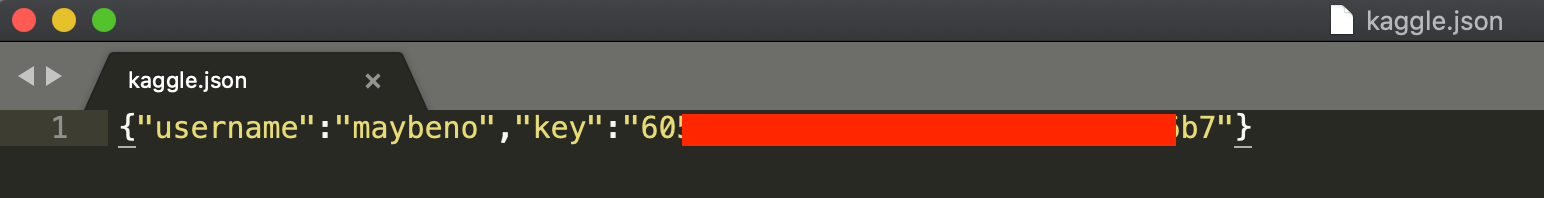

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [12]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.3.2-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 172.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 229.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [13]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [101]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "guilhermelawrence"
kaggle_key = "03ba5cb066e4bfcc134c741f98d56dbc"

# Save API token the kaggle.json file
with open("kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
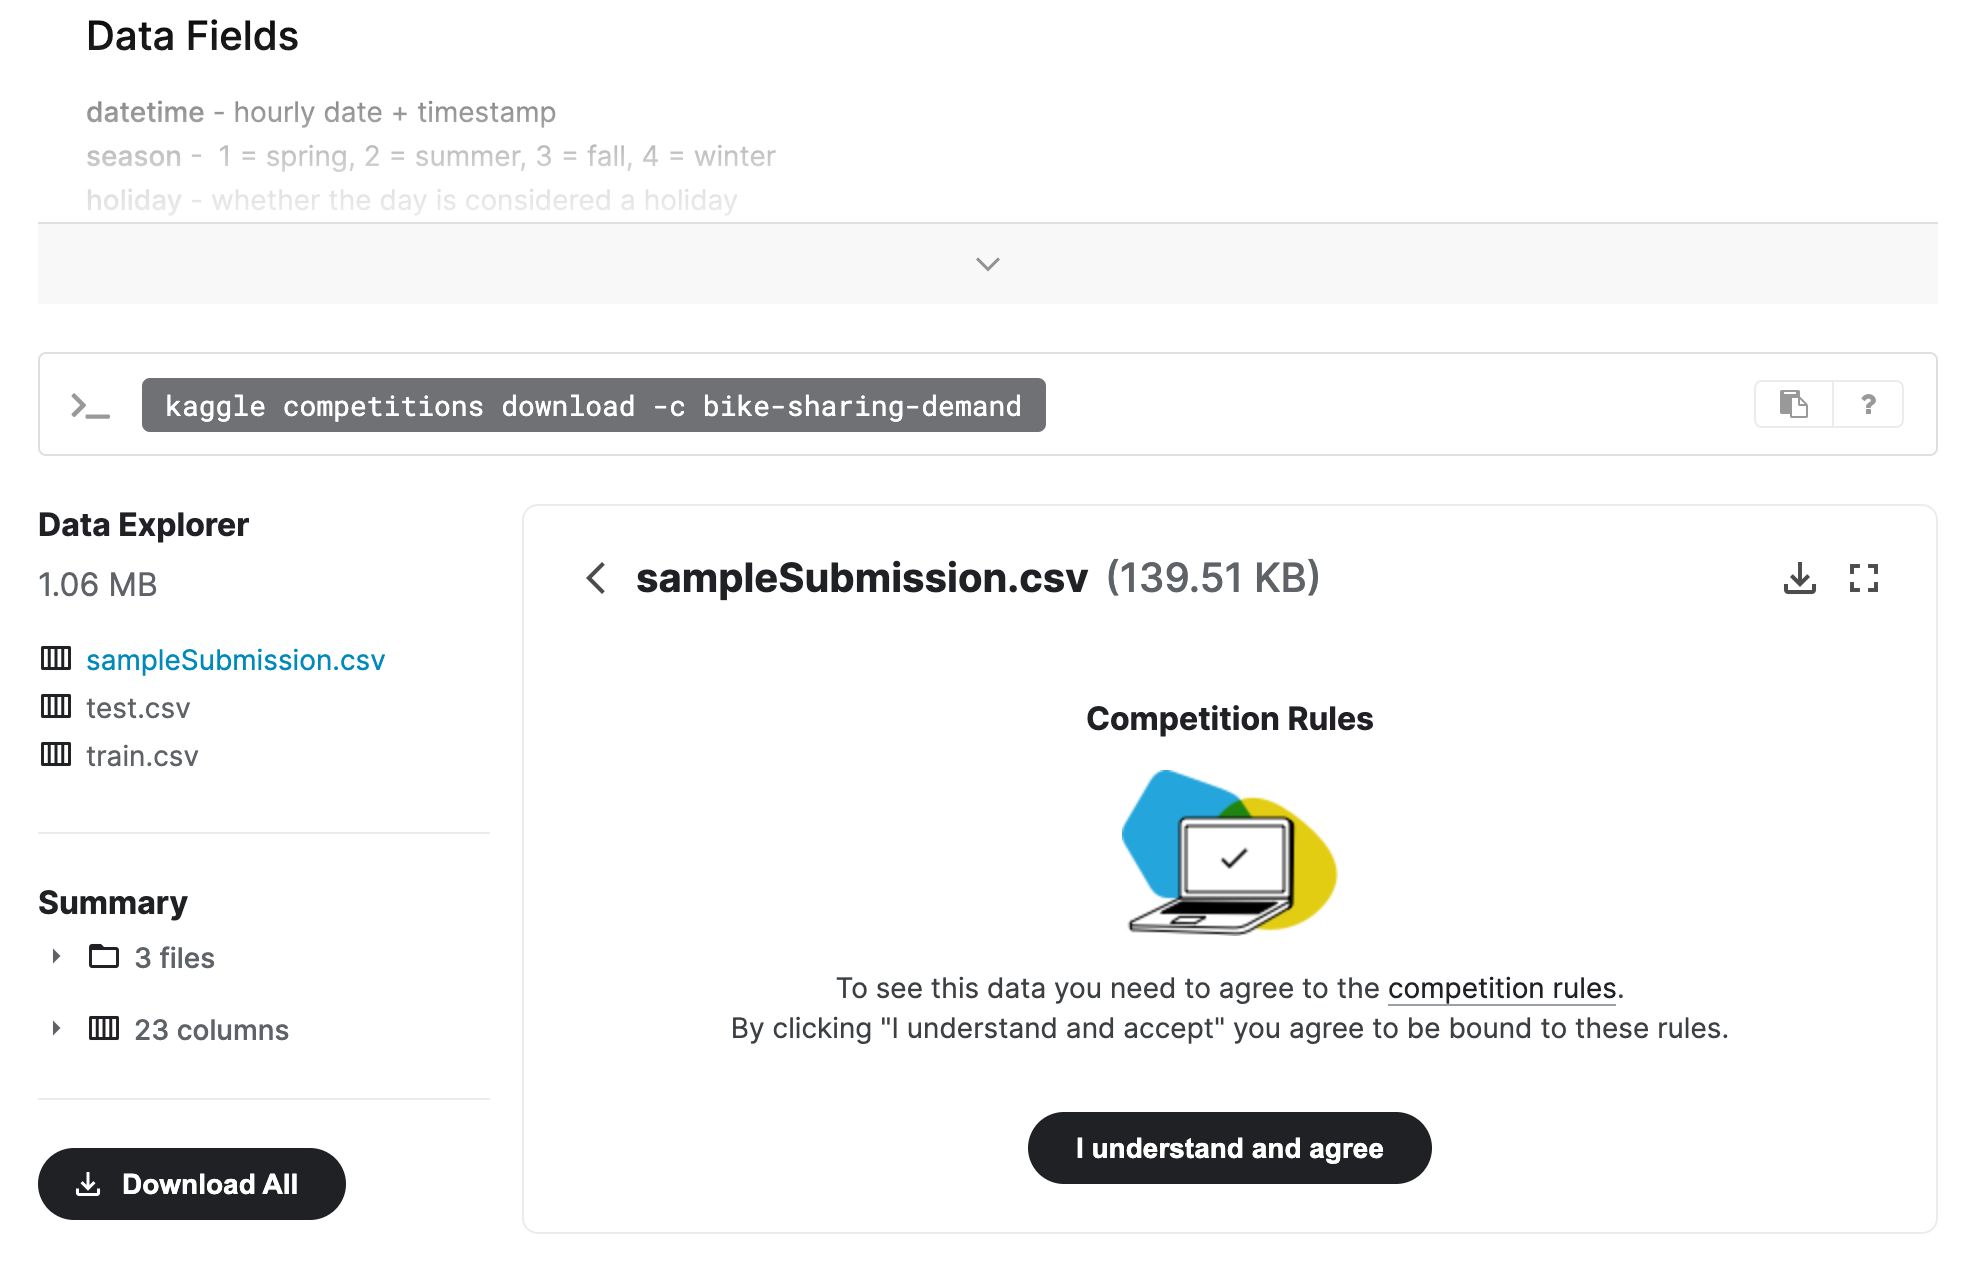

In [16]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.12', 'console_scripts', 'kaggle')())
  File "/usr/local/bin/kaggle", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/local/lib/python3.7/site-packages/importlib_metadata/__init__.py", line 208, in load
    module = import_module(match.group('module'))
  File "/usr/local/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<

In [17]:
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [18]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [20]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

<AxesSubplot:xlabel='datetime'>

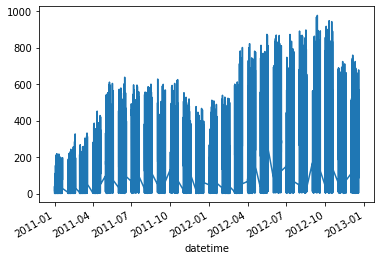

In [21]:
# bar plot of count vs date
train.groupby('datetime')['count'].sum().plot()

In [22]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [23]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [24]:
predictor = (
    TabularPredictor(label='count', eval_metric="root_mean_squared_error")
    .fit(train.drop(['datetime', 'casual', 'registered'], axis=1),
            presets='best_quality',
            time_limit=60)
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230218_232234/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230218_232234/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 9 09:57:03 UTC 2022
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Featu

### Review AutoGluon's training run with ranking of models that did the best.

In [25]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L2 -144.494742       2.924874  54.260166                0.457544          21.693235            2       True          5
1    WeightedEnsemble_L3 -144.494742       2.925585  54.264060                0.000712           0.003894            3       True          6
2    WeightedEnsemble_L2 -144.843001       2.363762  32.753480                0.000626           0.212152            2       True          4
3      LightGBMXT_BAG_L1 -145.564847       2.258436  32.519514                2.258436          32.519514            1       True          3
4  KNeighborsUnif_BAG_L1 -160.517467       0.104194   0.025603                0.104194           0.025603            1       True          1
5  KNeighborsDist_BAG_L1 -169.654635       0.104700   0.021814                0.104700      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -160.51746660830347,
  'KNeighborsDist_BAG_L1': -169.6546353414388,
  'LightGBMXT_BAG_L1': -145.56484674145977,
  'WeightedEnsemble_L2': -144.84300119461497,
  'LightGBMXT_BAG_L2': -144.49474236016607,
  'WeightedEnsemble_L3': -144.49474236016607},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230218_232234/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230218_232234/models/KNeighborsDist_BAG_L1/',
  'LightGBMXT_BAG_L1': 'AutogluonModels/ag-20230218_232234/models/LightGBMXT_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-

### Create predictions from test dataset

In [26]:
predictions = predictor.predict(test)
predictions.head()

0    118.350136
1     70.314438
2     70.314438
3     67.974792
4     67.974792
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [27]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      184.668472
std       106.055511
min        15.706678
25%        99.208656
50%       161.239319
75%       259.570740
max       559.397400
Name: count, dtype: float64

In [28]:
predictions

0       118.350136
1        70.314438
2        70.314438
3        67.974792
4        67.974792
           ...    
6488    122.786423
6489    122.786423
6490    100.494553
6491     79.417892
6492     75.602768
Name: count, Length: 6493, dtype: float32

In [29]:
# How many negative values do we have?
negative = np.sum(predictions < 0)
positive = np.sum(predictions >= 0)
print(f"Negative: {negative}, Positive: {positive}, percent: {negative / (negative + positive)}")

Negative: 0, Positive: 6493, percent: 0.0


### Set predictions to submission dataframe, save, and submit

In [30]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.12', 'console_scripts', 'kaggle')())
  File "/usr/local/bin/kaggle", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/local/lib/python3.7/site-packages/importlib_metadata/__init__.py", line 208, in load
    module = import_module(match.group('module'))
  File "/usr/local/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.12', 'console_scripts', 'kaggle')())
  File "/usr/local/bin/kaggle", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/local/lib/python3.7/site-packages/importlib_metadata/__init__.py", line 208, in load
    module = import_module(match.group('module'))
  File "/usr/local/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<

#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

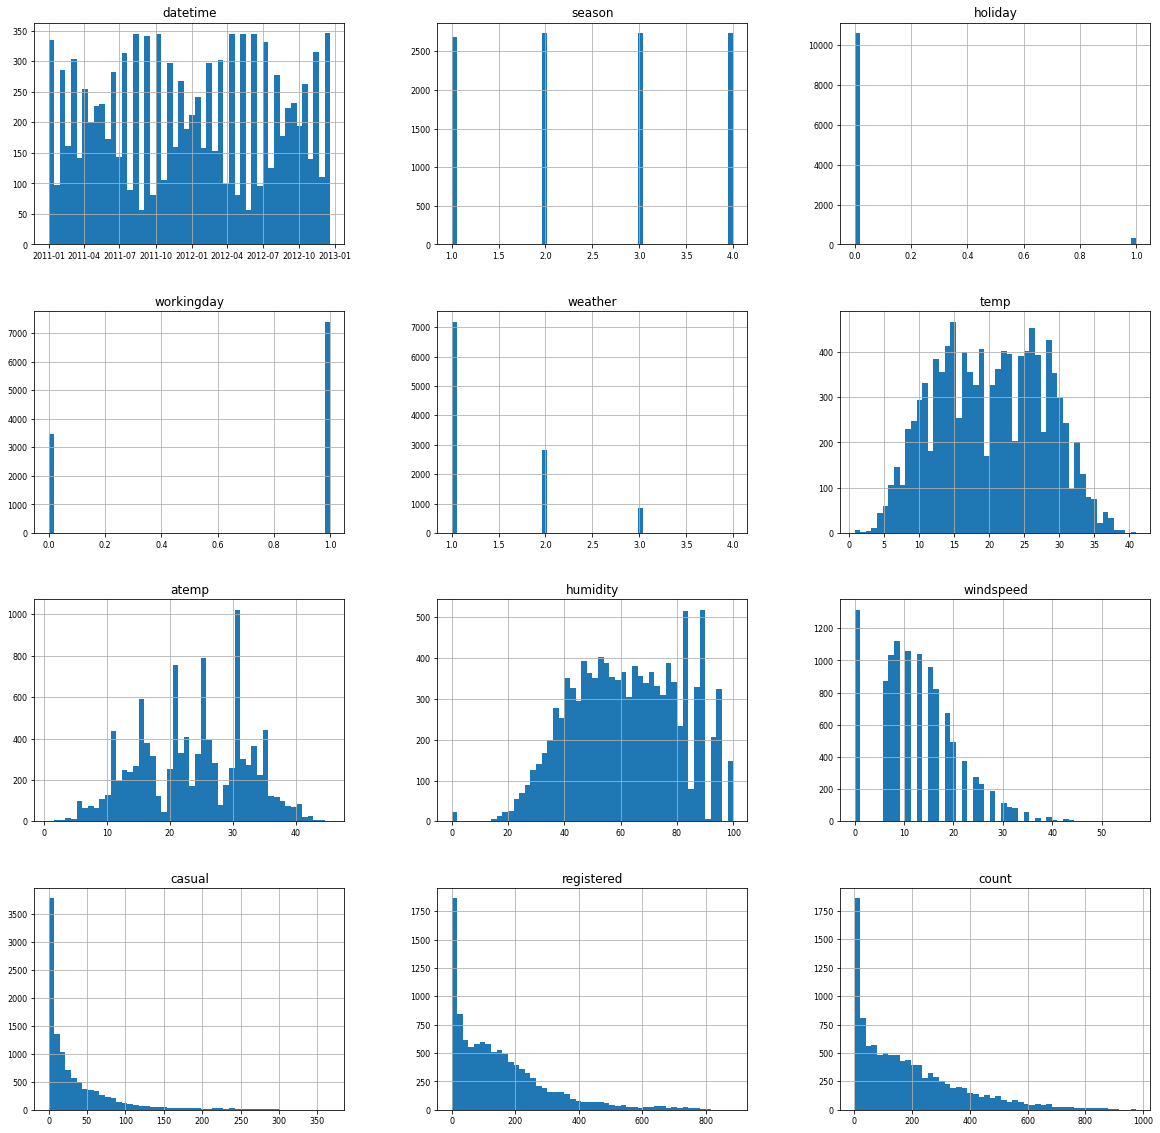

In [33]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [34]:
# create a new feature
train['day_of_week'] = train['datetime'].dt.dayofweek
test['day_of_week'] = test['datetime'].dt.dayofweek

train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [35]:
train["season"]  = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["day_of_week"] = train["day_of_week"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["day_of_week"] = test["day_of_week"].astype("category")

In [36]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count day_of_week  hour  
0        81        0.0       3          13     16           5     0  
1        80        0.0       8          32     40           5     1  
2        80        0.0       5          27     32           5     2  
3        75        0.0       3          10     13           5     3  
4        75        0.0       0           1      1           5     4

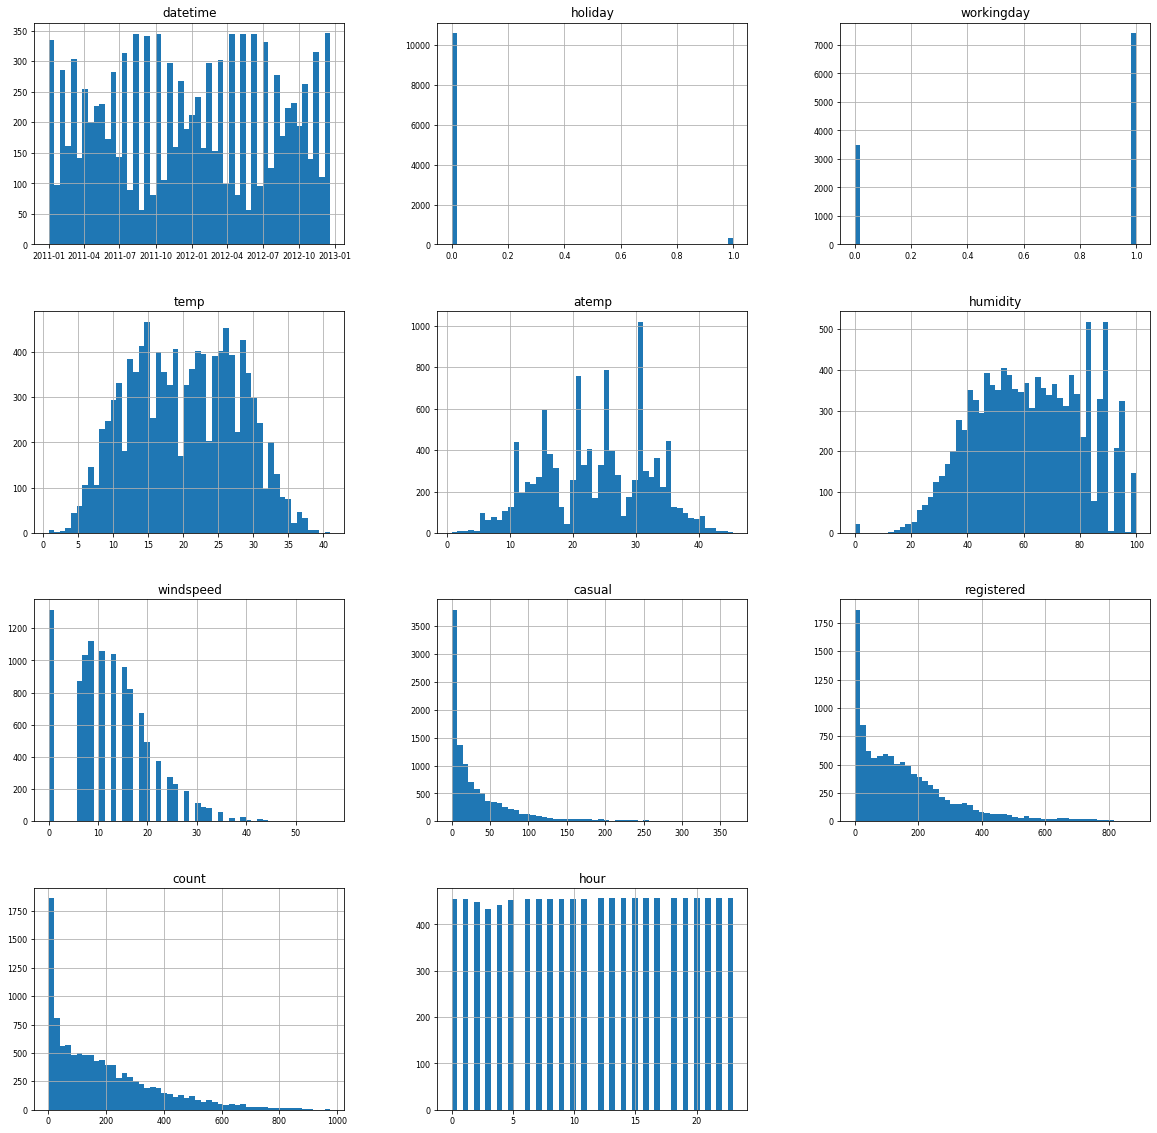

In [37]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Step 5: Rerun the model with the same settings as before, just with more features

In [38]:
predictor_new_features = (TabularPredictor(label='count', eval_metric="root_mean_squared_error")
    .fit(train.drop(['datetime', 'casual', 'registered'], axis=1),
            presets='best_quality',
            time_limit=60)
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230218_232404/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230218_232404/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 9 09:57:03 UTC 2022
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feat

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2  -59.606168      12.502173  66.040504                0.001272           0.240724            2       True          4
1      LightGBMXT_BAG_L1  -59.642239      12.397146  65.780806               12.397146          65.780806            1       True          3
2  KNeighborsUnif_BAG_L1 -124.768254       0.102788   0.019319                0.102788           0.019319            1       True          1
3  KNeighborsDist_BAG_L1 -125.617695       0.103755   0.018975                0.103755           0.018975            1       True          2
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Pro

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -124.76825428589918,
  'KNeighborsDist_BAG_L1': -125.61769498064501,
  'LightGBMXT_BAG_L1': -59.64223928847613,
  'WeightedEnsemble_L2': -59.606167735581344},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230218_232404/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist_BAG_L1': 'AutogluonModels/ag-20230218_232404/models/KNeighborsDist_BAG_L1/',
  'LightGBMXT_BAG_L1': 'AutogluonModels/ag-20230218_232404/models/LightGBMXT_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230218_232404/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.019318819046020508,
  'KNeighborsDist_BAG_L1': 0.018975019454956055,
  'LightGBMXT_BAG_L1': 65.7

In [40]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    27.624971
1    -9.681025
2   -13.171815
3   -11.365379
4   -15.191708
Name: count, dtype: float32

In [41]:
predictions_new_features.describe()

count    6493.000000
mean      191.094528
std       167.660172
min       -51.420200
25%        48.145187
50%       154.038971
75%       284.283539
max       829.521484
Name: count, dtype: float64

In [42]:
# How many negative values do we have?
negative = predictions_new_features[predictions_new_features > 0].sum()
positive = predictions_new_features[predictions_new_features <= 0].sum()
print(f"Negative: {negative}, Positive: {positive}, percent: {negative / (negative + positive)}")


Negative: 1242864.0, Positive: -2087.35791015625, percent: 1.0016822814941406


In [43]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features["count"] = submission_new_features["count"].apply(lambda x : x if x > 0 else 0)
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.12', 'console_scripts', 'kaggle')())
  File "/usr/local/bin/kaggle", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/local/lib/python3.7/site-packages/importlib_metadata/__init__.py", line 208, in load
    module = import_module(match.group('module'))
  File "/usr/local/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.5.12', 'console_scripts', 'kaggle')())
  File "/usr/local/bin/kaggle", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/local/lib/python3.7/site-packages/importlib_metadata/__init__.py", line 208, in load
    module = import_module(match.group('module'))
  File "/usr/local/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 953, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [92]:
import autogluon.core as ag

nn_options  = {  'num_epochs': 10}
gbm_options = {  'num_boost_round': 100,  'num_leaves': ag.space.Int(lower=20, upper=50, default=35)}

predictor_new_hpo = (TabularPredictor(label='count', eval_metric="root_mean_squared_error")
                    .fit(train.drop(['datetime', 'casual', 'registered'], axis=1),
                         presets='best_quality',
                         time_limit=60,
                         hyperparameters={'NN_TORCH': nn_options,'GBM': gbm_options},  # When these keys are missing from hyperparameters dict, no models of that type are trained
                         hyperparameter_tune_kwargs={ 'scheduler' : 'local','searcher': 'auto'}))

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 59.8s of the -15.76s of remaining time.
	-67.8228	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 75.97s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230218_235646/")


In [ ]:
predictor_new_hpo.fit_summary()

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [ ]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo["count"] = submission_new_hpo["count"].apply(lambda x : x if x > 0 else 0)
submission_new_hpo.to_csv("submission_new_hpo2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

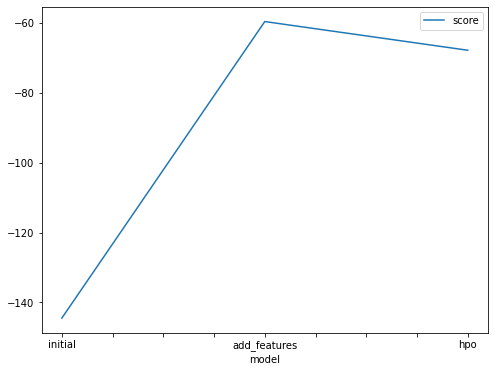

In [97]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
scores = [predictor.leaderboard(silent=True)['score_val'][0],predictor_new_features.leaderboard(silent=True)['score_val'][0],predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": scores
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

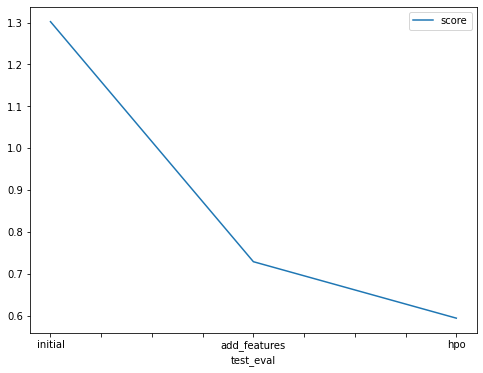

In [98]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.30209, 0.72863, 0.59377]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [108]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "presets": ['best_quality','best_quality', 'best_quality'],
    "time_limit": [60, 60, 60],
    "gbm_options":['defalts','defaults',"'num_boost_round': 100,  'num_leaves': ag.space.Int(lower=20, upper=50, default=35)"],
    "NN_TORCH"  : ['defalts','defaults','num_epochs = 10'],
    "score": scores
})

model       presets  time_limit  \
0       initial  best_quality          60   
1  add_features  best_quality          60   
2           hpo  best_quality          60   

                                         gbm_options         NN_TORCH  \
0                                            defalts          defalts   
1                                           defaults         defaults   
2  'num_boost_round': 100,  'num_leaves': ag.spac...  num_epochs = 10   

        score  
0 -144.494742  
1  -59.606168  
2  -67.815518